In [2]:
# Import
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Import data
df2 = pd.read_csv('ML.csv')

df2.head()

#Pred column is the prediction that would accurately predict the next days move

,open,high,low,close,F01,F02,F03,F04,F05,F06,F08,F09,Log Return,Pred
0,532.260010,532.260010,528.919983,528.919983,484.153992,443.728998,342.860399,68.479980,91.129974,264.149994,0.042608,83.542325,0.024634,1
1,537.400024,567.030029,537.099976,567.030029,505.938000,450.714499,346.461500,108.920044,139.710022,360.110031,0.031778,89.503865,0.069575,1
2,571.950012,583.580017,571.950012,583.580017,533.926001,458.625500,349.605500,139.940002,158.220032,314.400024,0.028854,100.000000,0.028769,0
3,575.580017,580.510010,574.690002,574.690002,554.054004,467.410001,353.086600,100.640015,175.690002,348.110001,0.031198,92.492813,-0.015351,1
4,577.890015,666.549988,577.890015,666.549988,584.154004,479.946001,357.534200,150.500000,250.720001,444.759995,0.115708,94.717130,0.148284,1


In [3]:
X = df2.iloc[:, 0:12].values#Our features are columns 1:12
y = df2.iloc[:, 13].values #(we want to predict column 13 'Log Return')

#Split test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)#split data




print(X.shape)
print(y.shape)


(939, 12)
(939,)


In [4]:
#scale down all inputs
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing Neural Network
classifier = Sequential()

classifier.add(Dense(activation = 'relu',input_dim=12,units=6,kernel_initializer='uniform'))
classifier.add(Dense(activation = 'relu',units=6,kernel_initializer='uniform'))
classifier.add(Dense(activation = 'sigmoid',units = 1, kernel_initializer = 'uniform', ))

# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 30, nb_epoch = 100)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


Using TensorFlow backend.
W1001 23:13:21.938371  5896 deprecation_wrapper.py:119] From C:\Users\Seb Usai\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1001 23:13:21.972310  5896 deprecation_wrapper.py:119] From C:\Users\Seb Usai\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1001 23:13:21.979259  5896 deprecation_wrapper.py:119] From C:\Users\Seb Usai\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1001 23:13:22.034151  5896 deprecation_wrapper.py:119] From C:\Users\Seb Usai\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1001 23:13:22.058082  5896 deprecation_wr

Epoch 1/100
751/751 [==============================] - 0s 559us/step - loss: 0.6927 - acc: 0.5593
Epoch 2/100
751/751 [==============================] - 0s 42us/step - loss: 0.6918 - acc: 0.5579
Epoch 3/100
751/751 [==============================] - 0s 45us/step - loss: 0.6909 - acc: 0.5579
Epoch 4/100
751/751 [==============================] - 0s 60us/step - loss: 0.6899 - acc: 0.5579
Epoch 5/100
751/751 [==============================] - 0s 46us/step - loss: 0.6885 - acc: 0.5579
Epoch 6/100
751/751 [==============================] - 0s 50us/step - loss: 0.6882 - acc: 0.5579
Epoch 7/100
751/751 [==============================] - 0s 49us/step - loss: 0.6873 - acc: 0.5579
Epoch 8/100
751/751 [==============================] - 0s 42us/step - loss: 0.6861 - acc: 0.5579
Epoch 9/100
751/751 [==============================] - 0s 49us/step - loss: 0.6857 - acc: 0.5579
Epoch 10/100
751/751 [==============================] - 0s 56us/step - loss: 0.6845 - acc: 0.5579
Epoch 11/100
751/751 [======

In [5]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[18 65]
 [12 93]]


We get roughly 51%-5%accuracy 

In [6]:
print(y_pred)
import seaborn as sns
#sns.pairplot(df2, hue='Pred')

[[ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 

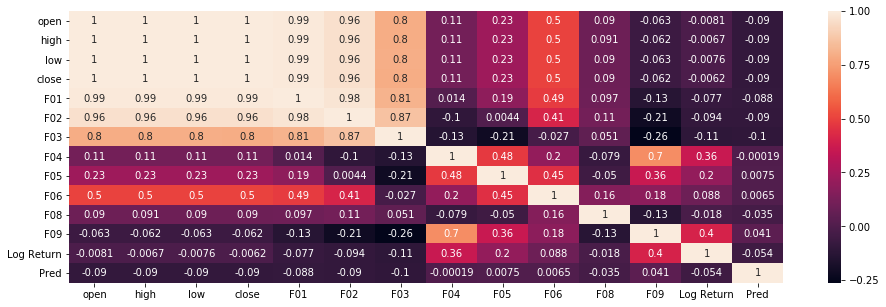

In [7]:
plt.figure(figsize = (16,5))
sns.heatmap(df2.corr(), annot=True)

AUC: 0.610


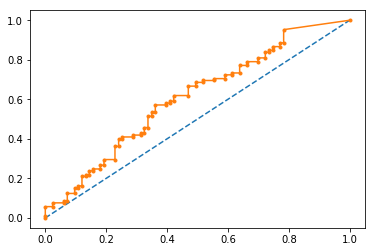

In [11]:

# Compute ROC curve and ROC area for each class


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# predict probabilities
probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 0]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()
